In [54]:
import pandas as pd
import anndata as ad
import tarfile
import scanpy as sc
from scipy.io import mmread
import numpy as np
from scipy.stats import median_abs_deviation
import matplotlib.pyplot as plt

### Read the files (skip after first time)

In [4]:
file_path1 = "C:/Users/gajaj/Downloads/GSM7710073_C3L-00004-T1_CPT0001540013_snRNA_ccRCC.tar.gz"
file_path2 = "C:/Users/gajaj/Downloads/GSM7710088_C3N-00495-T1_CPT0078510004_snRNA_ccRCC.tar.gz"
output_dir1 = 'C:/Users/gajaj/OneDrive/Documents/TUM/computational_single_cell/preprocessing_project/Sample1'
output_dir2 = "C:/Users/gajaj/OneDrive/Documents/TUM/computational_single_cell/preprocessing_project/Sample2"

In [6]:
with tarfile.open(file_path1, "r") as tar:
    tar.extractall(path=output_dir1)
    print("Files extracted successfully")

Files extracted successfully


In [7]:
with tarfile.open(file_path2, "r") as tar:
    tar.extractall(path=output_dir2)
    print("Files extracted successfully")

Files extracted successfully


In [14]:
input_file_barcodes1 = "Sample1/C3L-00004-T1_CPT0001540013_snRNA_ccRCC/outs/raw_feature_bc_matrix/barcodes.tsv.gz"
input_file_features1 = "Sample1/C3L-00004-T1_CPT0001540013_snRNA_ccRCC/outs/raw_feature_bc_matrix/features.tsv.gz"
input_file_matrix1 = "Sample1/C3L-00004-T1_CPT0001540013_snRNA_ccRCC/outs/raw_feature_bc_matrix/matrix.mtx.gz"

input_file_barcodes2 = "Sample2/C3N-00495-T1_CPT0078510004_snRNA_ccRCC/outs/raw_feature_bc_matrix/barcodes.tsv.gz"
input_file_features2 = "Sample2/C3N-00495-T1_CPT0078510004_snRNA_ccRCC/outs/raw_feature_bc_matrix/features.tsv.gz"
input_file_matrix2 = "Sample2/C3N-00495-T1_CPT0078510004_snRNA_ccRCC/outs/raw_feature_bc_matrix/matrix.mtx.gz"

In [15]:
output_file_barcodes1 = "Sample1/C3L-00004-T1_CPT0001540013_snRNA_ccRCC/outs/raw_feature_bc_matrix/barcodes.tsv"
output_file_features1 = "Sample1/C3L-00004-T1_CPT0001540013_snRNA_ccRCC/outs/raw_feature_bc_matrix/features.tsv"
output_file_matrix1 = "Sample1/C3L-00004-T1_CPT0001540013_snRNA_ccRCC/outs/raw_feature_bc_matrix/matrix.mtx"

output_file_barcodes2 = "Sample2/C3N-00495-T1_CPT0078510004_snRNA_ccRCC/outs/raw_feature_bc_matrix/barcodes.tsv"
output_file_features2 = "Sample2/C3N-00495-T1_CPT0078510004_snRNA_ccRCC/outs/raw_feature_bc_matrix/features.tsv"
output_file_matrix2 = "Sample2/C3N-00495-T1_CPT0078510004_snRNA_ccRCC/outs/raw_feature_bc_matrix/matrix.mtx"

In [10]:
import gzip

with gzip.open(input_file_barcodes1, "rt") as gz_file:  
    with open(output_file_barcodes1, "w") as out_file:
        out_file.write(gz_file.read())

In [11]:
with gzip.open(input_file_features1, "rt") as gz_file:  
    with open(output_file_features1, "w") as out_file:
        out_file.write(gz_file.read())

In [16]:
with gzip.open(input_file_matrix1, "rt") as gz_file:  
    with open(output_file_matrix1, "w") as out_file:
        out_file.write(gz_file.read())

In [17]:
with gzip.open(input_file_barcodes2, "rt") as gz_file:  
    with open(output_file_barcodes2, "w") as out_file:
        out_file.write(gz_file.read())

In [18]:
with gzip.open(input_file_features2, "rt") as gz_file:  
    with open(output_file_features2, "w") as out_file:
        out_file.write(gz_file.read())

In [19]:
with gzip.open(input_file_matrix2, "rt") as gz_file:  
    with open(output_file_matrix2, "w") as out_file:
        out_file.write(gz_file.read())

### Create an Anndata object for Sample 1

In [55]:
output_file_barcodes1 = "Sample1/C3L-00004-T1_CPT0001540013_snRNA_ccRCC/outs/raw_feature_bc_matrix/barcodes.tsv"
output_file_features1 = "Sample1/C3L-00004-T1_CPT0001540013_snRNA_ccRCC/outs/raw_feature_bc_matrix/features.tsv"
output_file_matrix1 = "Sample1/C3L-00004-T1_CPT0001540013_snRNA_ccRCC/outs/raw_feature_bc_matrix/matrix.mtx"

output_file_barcodes2 = "Sample2/C3N-00495-T1_CPT0078510004_snRNA_ccRCC/outs/raw_feature_bc_matrix/barcodes.tsv"
output_file_features2 = "Sample2/C3N-00495-T1_CPT0078510004_snRNA_ccRCC/outs/raw_feature_bc_matrix/features.tsv"
output_file_matrix2 = 'Sample2/C3N-00495-T1_CPT0078510004_snRNA_ccRCC/outs/raw_feature_bc_matrix/matrix.mtx'

In [56]:
barcodes1 = pd.read_csv(output_file_barcodes1, sep='\t', index_col=None, header=None)[0].values
barcodes1

array(['AAACCCAAGAAACCAT-1', 'AAACCCAAGAAACCCA-1', 'AAACCCAAGAAACGAA-1',
       ..., 'TTTGTTGTCTTTGCGC-1', 'TTTGTTGTCTTTGCTA-1',
       'TTTGTTGTCTTTGGCT-1'], dtype=object)

In [57]:
features1 = pd.read_csv(output_file_features1, sep='\t', index_col=None, header=None)[1].values
features1

array(['MIR1302-2HG', 'FAM138A', 'OR4F5', ..., 'AC007325.1', 'AC007325.4',
       'AC007325.2'], dtype=object)

In [58]:
gene_ids1 = pd.read_csv(output_file_features1, sep='\t', index_col=None, header=None)[0].values
gene_ids1

array(['ENSG00000243485', 'ENSG00000237613', 'ENSG00000186092', ...,
       'ENSG00000276017', 'ENSG00000278817', 'ENSG00000277196'],
      dtype=object)

In [59]:
X1 = mmread(output_file_matrix1).tocsc()  # Convert to compressed sparse column format

In [60]:
adata1 = sc.AnnData(X1.T)  # Transpose matrix (cells x genes)
adata1.obs_names = barcodes1  # Assign cell barcodes as obs_names
adata1.var_names = features1  # Assign gene names as var_names

adata1.var["gene_ids"] = gene_ids1

In [61]:
print(adata1)

AnnData object with n_obs × n_vars = 1127217 × 36601
    var: 'gene_ids'


In [62]:
print(adata1.var)

                    gene_ids
MIR1302-2HG  ENSG00000243485
FAM138A      ENSG00000237613
OR4F5        ENSG00000186092
AL627309.1   ENSG00000238009
AL627309.3   ENSG00000239945
...                      ...
AC141272.1   ENSG00000277836
AC023491.2   ENSG00000278633
AC007325.1   ENSG00000276017
AC007325.4   ENSG00000278817
AC007325.2   ENSG00000277196

[36601 rows x 1 columns]


In [63]:
print(adata1.obs_names)

Index(['AAACCCAAGAAACCAT-1', 'AAACCCAAGAAACCCA-1', 'AAACCCAAGAAACGAA-1',
       'AAACCCAAGAAACTAC-1', 'AAACCCAAGAACACGT-1', 'AAACCCAAGAACCCGA-1',
       'AAACCCAAGAACGTGC-1', 'AAACCCAAGAACTGAT-1', 'AAACCCAAGAAGCGCT-1',
       'AAACCCAAGAAGGATG-1',
       ...
       'TTTGTTGTCTTCTTCC-1', 'TTTGTTGTCTTGCAAG-1', 'TTTGTTGTCTTGCGCT-1',
       'TTTGTTGTCTTGGCTC-1', 'TTTGTTGTCTTTCCGG-1', 'TTTGTTGTCTTTCTTC-1',
       'TTTGTTGTCTTTGCAT-1', 'TTTGTTGTCTTTGCGC-1', 'TTTGTTGTCTTTGCTA-1',
       'TTTGTTGTCTTTGGCT-1'],
      dtype='object', length=1127217)


### Create an Anndata object for Sample 2

In [11]:
barcodes2 = pd.read_csv(output_file_barcodes2, sep='\t', index_col=None, header=None)[0].values
barcodes2

array(['AAACCCAAGAAACACT-1', 'AAACCCAAGAAACTAC-1', 'AAACCCAAGAAAGACA-1',
       ..., 'TTTGTTGTCTTTACAC-1', 'TTTGTTGTCTTTGCGC-1',
       'TTTGTTGTCTTTGCTA-1'], dtype=object)

In [12]:
features2 = pd.read_csv(output_file_features2, sep='\t', index_col=None, header=None)[1].values
features2

array(['MIR1302-2HG', 'FAM138A', 'OR4F5', ..., 'AC007325.1', 'AC007325.4',
       'AC007325.2'], dtype=object)

In [13]:
gene_ids2 = pd.read_csv(output_file_features2, sep='\t', index_col=None, header=None)[0].values
gene_ids2

array(['ENSG00000243485', 'ENSG00000237613', 'ENSG00000186092', ...,
       'ENSG00000276017', 'ENSG00000278817', 'ENSG00000277196'],
      dtype=object)

In [14]:
X2 = mmread(output_file_matrix2).tocsc()  # Convert to compressed sparse column format

In [15]:
adata2 = sc.AnnData(X2.T)  # Transpose matrix (cells x genes)
adata2.obs_names = barcodes2  # Assign cell barcodes as obs_names
adata2.var_names = features2  # Assign gene names as var_names

adata2.var["gene_ids"] = gene_ids2

In [16]:
print(adata2)

AnnData object with n_obs × n_vars = 940788 × 36601
    var: 'gene_ids'


In [17]:
adata2.var

,gene_ids
MIR1302-2HG,ENSG00000243485
FAM138A,ENSG00000237613
OR4F5,ENSG00000186092
AL627309.1,ENSG00000238009
AL627309.3,ENSG00000239945
...,...
AC141272.1,ENSG00000277836
AC023491.2,ENSG00000278633
AC007325.1,ENSG00000276017
AC007325.4,ENSG00000278817


## Preprocessing Sample 1

In [64]:
adata1.var_names_make_unique()

### Quality control

In [65]:
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
adata1.var["mt"] = adata1.var_names.str.startswith("MT-")
# ribosomal genes
adata1.var["ribo"] = adata1.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes
adata1.var["hb"] = adata1.var_names.str.contains("^HB[^(P)]")

adata1.var

,gene_ids,mt,ribo,hb
MIR1302-2HG,ENSG00000243485,False,False,False
FAM138A,ENSG00000237613,False,False,False
OR4F5,ENSG00000186092,False,False,False
AL627309.1,ENSG00000238009,False,False,False
AL627309.3,ENSG00000239945,False,False,False
...,...,...,...,...
AC141272.1,ENSG00000277836,False,False,False
AC023491.2,ENSG00000278633,False,False,False
AC007325.1,ENSG00000276017,False,False,False
AC007325.4,ENSG00000278817,False,False,False


In [66]:
sc.pp.calculate_qc_metrics(
    adata1, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True, percent_top=[20]
)

### Filtering low quality cells

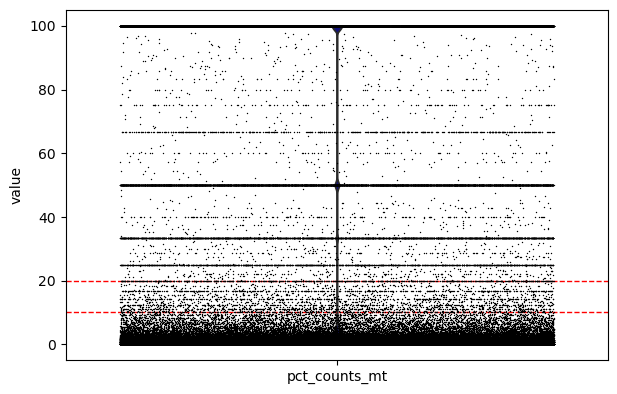

In [67]:
# Plot the violin plot
ax = sc.pl.violin(adata1, "pct_counts_mt", jitter=0.4, log=False, color='darkblue', show=False)

# Add horizontal lines for thresholds
thresholds = [10, 20]  # Replace with your desired percentages
for threshold in thresholds:
    plt.axhline(y=threshold, color='red', linestyle='--', linewidth=1)

# Show the plot
plt.show()

Most cells have mitochondrial percentages below the 20% threshold, indicating that a significant portion of the dataset represents viable and healthy cells.
A noticeable number of cells exceed the 20% threshold, which suggests these cells might be stressed, damaged, or dying. These should likely be filtered out to avoid introducing bias in downstream analyses.

In [68]:
print(adata1.shape)

(1127217, 36601)


In [69]:
adata1 = adata1[adata1.obs['pct_counts_mt'] < 20, :]


(789737, 36601)


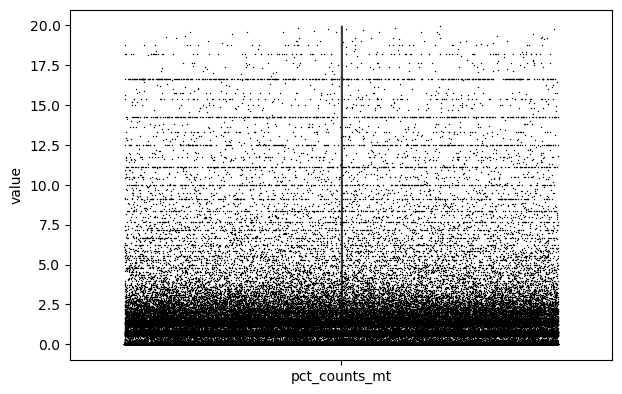

In [70]:
print(adata1.shape)  # Check the number of cells and genes
sc.pl.violin(adata1, ['pct_counts_mt'], jitter=0.4, log=False)


### Filter Cells Based on Total Genes

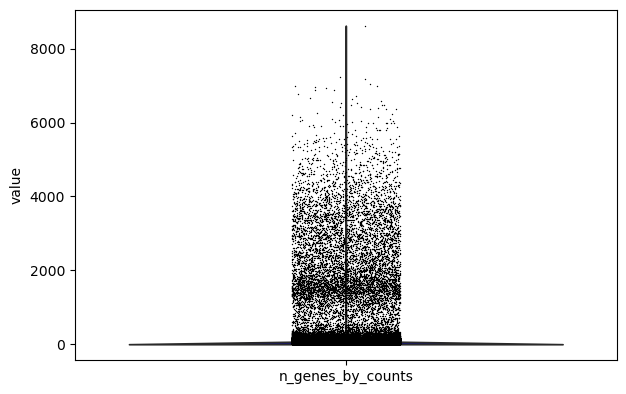

In [18]:
sc.pl.violin(adata1, 'n_genes_by_counts', color='darkblue')

c:\Users\gajaj\anaconda3\envs\preprocessing\lib\site-packages\scanpy\preprocessing\_simple.py:167: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number


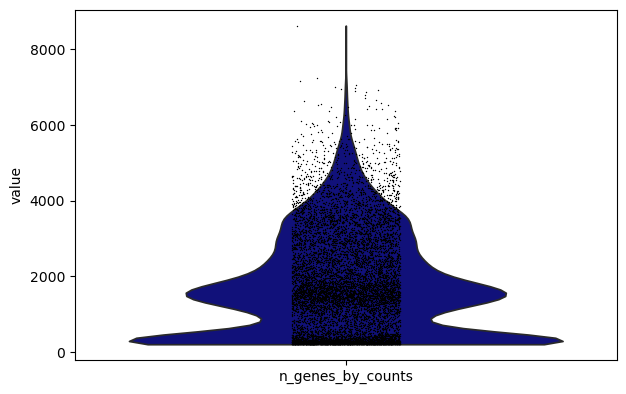

In [71]:
sc.pp.filter_cells(adata1, min_genes=200)
sc.pl.violin(adata1, 'n_genes_by_counts', color='darkblue')

In [72]:
print(adata1.shape)

(10394, 36601)


The updated violin plot after applying the lower bound of 200 for n_genes_by_counts looks better since the extreme low-quality cells (those with fewer than 200 detected genes) have been removed. This filtering step effectively eliminates potentially empty droplets or damaged cells.

However, there is still a tail extending to very high n_genes_by_counts values (>6,000–8,000). To remove potential doublets or aggregated cells with abnormally high gene counts, we apply an upper limit of 8000.

In [20]:
#upper bound
#adata1 = adata1[adata1.obs['n_genes_by_counts'] < 8000, :]

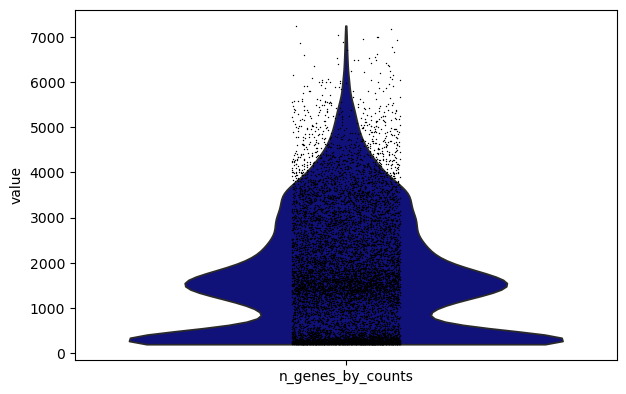

In [21]:
#sc.pl.violin(adata1, 'n_genes_by_counts', color='darkblue')

### Filter Cells Based on Total Count

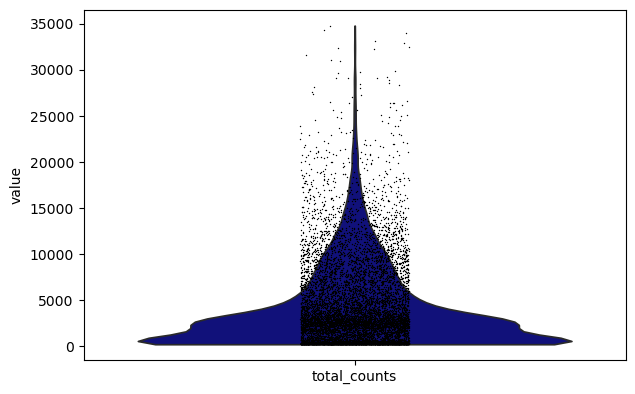

In [22]:
sc.pl.violin(adata1, "total_counts", color='darkblue')

Some cells have extremely low total counts, likely corresponding to damaged cells, empty droplets, or technical noise. We start by setting the lower bound to 500.

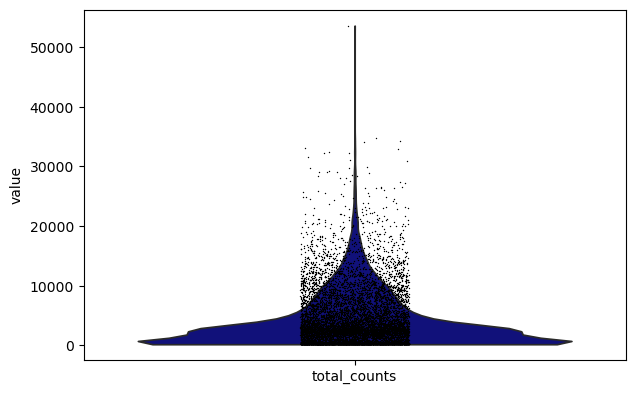

In [113]:
adata1 = adata1[adata1.obs['total_counts'] > 100, :]
sc.pl.violin(adata1, "total_counts", color='darkblue')

In [114]:
print(adata1.shape)

(10394, 2000)


Cells with extremely high total counts are often doublets or aggregates and should be filtered out.
Based on the plot, an upper bound around 20,000–30,000 total counts seems reasonable.

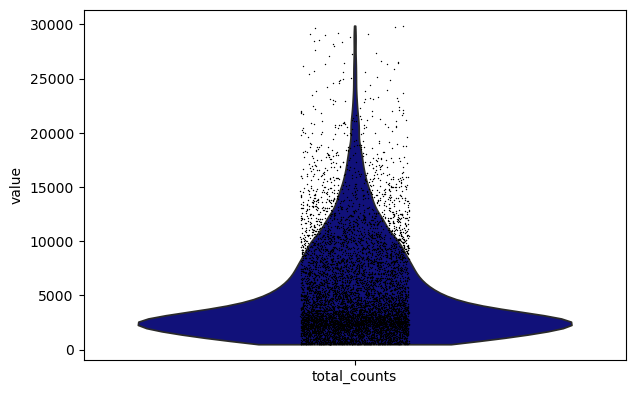

In [24]:
#adata1 = adata1[adata1.obs['total_counts'] < 30000, :]
#sc.pl.violin(adata1, "total_counts", color='darkblue')

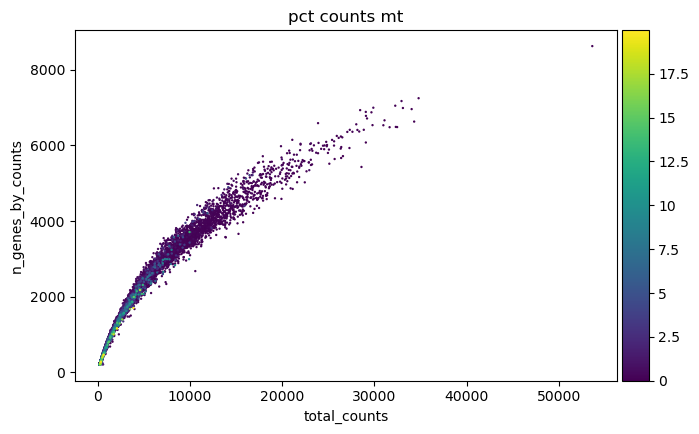

In [73]:
sc.pl.scatter(adata1, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [53]:
print(adata1.shape)

(8024, 36601)


## Filtering the outliers in a data-driven way

Define a function to find outliers in a data-driven way:

In [74]:
def is_outlier(adata, metric: str, nmads: int):
    M = adata.obs[metric]
    outlier = (M < np.median(M) - nmads * median_abs_deviation(M)) | (
        np.median(M) + nmads * median_abs_deviation(M) < M
    )
    return outlier

In [75]:
adata1.obs["outlier"] = (
    is_outlier(adata1, "log1p_total_counts", 6)
    | is_outlier(adata1, "log1p_n_genes_by_counts", 6)
    | is_outlier(adata1, "pct_counts_in_top_20_genes", 6)
)
adata1.obs.outlier.value_counts()

outlier
False    10348
True        46
Name: count, dtype: int64

In [76]:
adata1.obs["mt_outlier"] = is_outlier(adata1, "pct_counts_mt", 3) | (
    adata1.obs["pct_counts_mt"] > 8
)
adata1.obs.mt_outlier.value_counts()

mt_outlier
False    7847
True     2547
Name: count, dtype: int64

In [77]:
adata1.obs["mt_outlier"]

AAACCCAAGGCCTAGA-1     True
AAACCCAAGTACTCGT-1    False
AAACCCAAGTGCCTCG-1    False
AAACCCAAGTTCCGGC-1    False
AAACCCACAAGGAGTC-1    False
                      ...  
TTTGTTGGTCCTTTGC-1    False
TTTGTTGTCATTACGG-1     True
TTTGTTGTCCACATAG-1     True
TTTGTTGTCCGACAGC-1     True
TTTGTTGTCTCGTCGT-1    False
Name: mt_outlier, Length: 10394, dtype: bool

### Load and filter metadata (cell types)

In [78]:
metadata = pd.read_csv("GSE240822_GBM_ccRCC_RNA_metadata_CPTAC_samples.tsv", sep="\t")
print(metadata.head())

                          Merged_barcode             Barcode  \
0  ccRCC_C3L-00088-T1_AAACCCAAGACGACTG-1  AAACCCAAGACGACTG-1   
1  ccRCC_C3L-00088-T1_AAACCCACAAATGATG-1  AAACCCACAAATGATG-1   
2  ccRCC_C3L-00088-T1_AAACCCACAATCCAGT-1  AAACCCACAATCCAGT-1   
3  ccRCC_C3L-00088-T1_AAACCCACACAATCTG-1  AAACCCACACAATCTG-1   
4  ccRCC_C3L-00088-T1_AAACCCACACTCCTTG-1  AAACCCACACTCCTTG-1   

                         Sample_RNA    Sample_ATAC    Case_ID      Piece_ID  \
0  CPT0000870003-CPT0000870003-lib1  CPT0000870003  C3L-00088  C3L-00088-T1   
1  CPT0000870003-CPT0000870003-lib1  CPT0000870003  C3L-00088  C3L-00088-T1   
2  CPT0000870003-CPT0000870003-lib1  CPT0000870003  C3L-00088  C3L-00088-T1   
3  CPT0000870003-CPT0000870003-lib1  CPT0000870003  C3L-00088  C3L-00088-T1   
4  CPT0000870003-CPT0000870003-lib1  CPT0000870003  C3L-00088  C3L-00088-T1   

  Sample_type data.type.rna Chemistry Cancer cell_type.harmonized.cancer  \
0       Tumor         snRNA    snATAC  ccRCC                    

Filter only the rows relevant to sample 1.

In [79]:
sample1_code = 'CPT0001540013'

metadata_sample1 = metadata[metadata['Sample_ATAC'] == sample1_code]
print(metadata_sample1)

                              Merged_barcode             Barcode  \
59257  ccRCC_C3L-00004-T1_AAACCCAAGTACTCGT-1  AAACCCAAGTACTCGT-1   
59258  ccRCC_C3L-00004-T1_AAACCCAAGTGCCTCG-1  AAACCCAAGTGCCTCG-1   
59259  ccRCC_C3L-00004-T1_AAACCCAAGTTCCGGC-1  AAACCCAAGTTCCGGC-1   
59260  ccRCC_C3L-00004-T1_AAACCCACACTGATTG-1  AAACCCACACTGATTG-1   
59261  ccRCC_C3L-00004-T1_AAACCCACAGATCATC-1  AAACCCACAGATCATC-1   
...                                      ...                 ...   
66107  ccRCC_C3L-00004-T1_TTTGGTTGTGGGCTCT-1  TTTGGTTGTGGGCTCT-1   
66108  ccRCC_C3L-00004-T1_TTTGGTTTCAAGATAG-1  TTTGGTTTCAAGATAG-1   
66109  ccRCC_C3L-00004-T1_TTTGTTGAGCTCCGAC-1  TTTGTTGAGCTCCGAC-1   
66110  ccRCC_C3L-00004-T1_TTTGTTGCATATCTCT-1  TTTGTTGCATATCTCT-1   
66111  ccRCC_C3L-00004-T1_TTTGTTGGTCCTTTGC-1  TTTGTTGGTCCTTTGC-1   

                        Sample_RNA    Sample_ATAC    Case_ID      Piece_ID  \
59257  CPT0001540013-CPT0001540013  CPT0001540013  C3L-00004  C3L-00004-T1   
59258  CPT0001540013-CPT000

In [80]:
# Subset relevant columns
metadata_subset = metadata[["Barcode", "cell_type.harmonized.cancer"]]
print(metadata_subset)


                   Barcode cell_type.harmonized.cancer
0       AAACCCAAGACGACTG-1                       Tumor
1       AAACCCACAAATGATG-1                     T-cells
2       AAACCCACAATCCAGT-1                       Tumor
3       AAACCCACACAATCTG-1                       Tumor
4       AAACCCACACTCCTTG-1                       Tumor
...                    ...                         ...
416642  TTTGTTGAGTCATTGC-1                     Neurons
416643  TTTGTTGAGTCTCCTC-1            Oligodendrocytes
416644  TTTGTTGCAACTCATG-1                       Tumor
416645  TTTGTTGGTAGCTTTG-1                     T-cells
416646  TTTGTTGTCATGTCTT-1                 Macrophages

[416647 rows x 2 columns]


In [81]:
barcodes = metadata_subset['Barcode']

In [82]:
adata1_filtered = adata1[adata1.obs.index.isin(barcodes)].copy()
print(adata1_filtered)

AnnData object with n_obs × n_vars = 7228 × 36601
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'outlier', 'mt_outlier'
    var: 'gene_ids', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'


In [83]:
print(adata1_filtered.obs.index)

Index(['AAACCCAAGGCCTAGA-1', 'AAACCCAAGTACTCGT-1', 'AAACCCAAGTGCCTCG-1',
       'AAACCCAAGTTCCGGC-1', 'AAACCCACACTGATTG-1', 'AAACCCACAGATCATC-1',
       'AAACCCACAGTCGGAA-1', 'AAACCCACATCGAAGG-1', 'AAACCCAGTCAATCTG-1',
       'AAACCCAGTCACTCAA-1',
       ...
       'TTTGGTTCAGCTACTA-1', 'TTTGGTTGTAGCGAGT-1', 'TTTGGTTGTCCAGAAG-1',
       'TTTGGTTGTGGGCTCT-1', 'TTTGGTTTCAAGATAG-1', 'TTTGTTGAGCACTGGA-1',
       'TTTGTTGAGCTCCGAC-1', 'TTTGTTGCAATCGCGC-1', 'TTTGTTGCATATCTCT-1',
       'TTTGTTGGTCCTTTGC-1'],
      dtype='object', length=7228)


In [84]:
metadata_filtered = metadata_subset[metadata_subset['Barcode'].isin(adata1_filtered.obs.index)]
print(metadata_filtered)

                   Barcode cell_type.harmonized.cancer
301     AAGCATCAGGTAAAGG-1                       Tumor
350     AAGGAATAGTTGTAGA-1                          NK
552     ACAAAGACAATACCTG-1                       Tumor
961     ACGTCCTAGAGATTCA-1                       Tumor
3112    CAGGCCAAGTTACGGG-1                       Tumor
...                    ...                         ...
415357  GTTCTATAGATCCAAA-1                 Macrophages
415625  TCAAGCATCCACATAG-1                 Macrophages
415981  TCTTGCGCATACTTTC-1                 Macrophages
416016  TGACGCGAGGGCCCTT-1                     Neurons
416513  TTGGGATAGGACCCAA-1                       Tumor

[7982 rows x 2 columns]


In [85]:
metadata_filtered = metadata_filtered.set_index('Barcode')
print(metadata_filtered)

                   cell_type.harmonized.cancer
Barcode                                       
AAGCATCAGGTAAAGG-1                       Tumor
AAGGAATAGTTGTAGA-1                          NK
ACAAAGACAATACCTG-1                       Tumor
ACGTCCTAGAGATTCA-1                       Tumor
CAGGCCAAGTTACGGG-1                       Tumor
...                                        ...
GTTCTATAGATCCAAA-1                 Macrophages
TCAAGCATCCACATAG-1                 Macrophages
TCTTGCGCATACTTTC-1                 Macrophages
TGACGCGAGGGCCCTT-1                     Neurons
TTGGGATAGGACCCAA-1                       Tumor

[7982 rows x 1 columns]


In [86]:
# Identify duplicated indexes
print(metadata_filtered.index.duplicated())

duplicated_indices = metadata_filtered.index[metadata_filtered.index.duplicated()]
print(duplicated_indices)

[False False False ...  True  True  True]
Index(['GAGGGTACAGGTGTTT-1', 'AAACGCTTCCCGTAAA-1', 'AAGCATCAGGTAAAGG-1',
       'AAGGAATAGTTGTAGA-1', 'AAGGTAACAACCGTGC-1', 'AATGAAGGTTCAAAGA-1',
       'ACAAAGACAATACCTG-1', 'ACAAGCTTCCGATAAC-1', 'ACACTGACACGGATCC-1',
       'ACATCGAAGCTCGAAG-1',
       ...
       'CCGGTAGAGTTAGTGA-1', 'CCTTGTGAGTTGGCTT-1', 'CTGTACCCACATTCTT-1',
       'GAGTTGTAGTAACCTC-1', 'GGGTTATAGCCACAAG-1', 'GTTCTATAGATCCAAA-1',
       'TCAAGCATCCACATAG-1', 'TCTTGCGCATACTTTC-1', 'TGACGCGAGGGCCCTT-1',
       'TTGGGATAGGACCCAA-1'],
      dtype='object', name='Barcode', length=754)


In [87]:
#Remove Duplicate Indices, keep first occurence
metadata_filtered_first = metadata_filtered[~metadata_filtered.index.duplicated(keep='first')]

In [88]:
#Remove Duplicate Indices, keep last occurence
metadata_filtered_last = metadata_filtered[~metadata_filtered.index.duplicated(keep='last')]

In [89]:
print('GAGGGTACAGGTGTTT-1' in metadata_filtered_first.index)
print('GAGGGTACAGGTGTTT-1' in metadata_filtered_last.index)

True
True


In [90]:
adata1_ann = pd.merge(adata1_filtered.obs, metadata_filtered_first, left_index=True, right_on='Barcode', how='inner')
print(adata1_ann)

                    n_genes_by_counts  log1p_n_genes_by_counts  total_counts  \
Barcode                                                                        
AAACCCAAGGCCTAGA-1                564                 6.336826           699   
AAACCCAAGTACTCGT-1               1221                 7.108244          1756   
AAACCCAAGTGCCTCG-1               1559                 7.352441          2526   
AAACCCAAGTTCCGGC-1               1017                 6.925595          1338   
AAACCCACACTGATTG-1               4892                 8.495561         15739   
...                               ...                      ...           ...   
TTTGTTGAGCACTGGA-1               5211                 8.558719         16451   
TTTGTTGAGCTCCGAC-1               1074                 6.980076          1568   
TTTGTTGCAATCGCGC-1                223                 5.411646           249   
TTTGTTGCATATCTCT-1               1729                 7.455877          2958   
TTTGTTGGTCCTTTGC-1               4131   

In [91]:
adata1_filtered.obs = adata1_ann

In [92]:
adata1_filtered.obs

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo,total_counts_hb,log1p_total_counts_hb,pct_counts_hb,n_genes,outlier,mt_outlier,cell_type.harmonized.cancer
Barcode,,,,,,,,,,,,,,,,,,
AAACCCAAGGCCTAGA-1,564,6.336826,699,6.551080,13.304721,10,2.397895,1.430615,4,1.609438,0.572246,0,0.000000,0.000000,564,False,True,Tumor
AAACCCAAGTACTCGT-1,1221,7.108244,1756,7.471363,9.794989,7,2.079442,0.398633,27,3.332205,1.537585,0,0.000000,0.000000,1221,False,False,T-cells
AAACCCAAGTGCCTCG-1,1559,7.352441,2526,7.834788,9.817894,5,1.791759,0.197941,26,3.295837,1.029295,0,0.000000,0.000000,1559,False,False,T-cells
AAACCCAAGTTCCGGC-1,1017,6.925595,1338,7.199678,10.687593,1,0.693147,0.074738,6,1.945910,0.448430,0,0.000000,0.000000,1017,False,False,Tumor
AAACCCACACTGATTG-1,4892,8.495561,15739,9.663961,12.211703,5,1.791759,0.031768,56,4.043051,0.355804,2,1.098612,0.012707,4892,False,False,Tumor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGAGCACTGGA-1,5211,8.558719,16451,9.708202,10.127044,659,6.492240,4.005836,105,4.663439,0.638259,4,1.609438,0.024315,5211,False,True,Plasma
TTTGTTGAGCTCCGAC-1,1074,6.980076,1568,7.358194,10.459184,4,1.609438,0.255102,10,2.397895,0.637755,0,0.000000,0.000000,1074,False,False,T-cells
TTTGTTGCAATCGCGC-1,223,5.411646,249,5.521461,18.473896,29,3.401197,11.646586,22,3.135494,8.835341,0,0.000000,0.000000,223,False,True,Tumor


#### Draw a umap

In [93]:
# Normalizing to median total counts
sc.pp.normalize_total(adata1_filtered)
# Logarithmize the data
sc.pp.log1p(adata1_filtered)

In [94]:
sc.pp.highly_variable_genes(adata1_filtered, n_top_genes=2000)

In [95]:
adata1_filtered = adata1_filtered[:, adata1_filtered.var.highly_variable]

In [96]:
sc.tl.pca(adata1_filtered)

c:\Users\gajaj\anaconda3\envs\preprocessing\lib\site-packages\scanpy\preprocessing\_pca.py:317: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca


In [97]:
sc.pp.neighbors(adata1_filtered)

In [98]:
sc.tl.umap(adata1_filtered)

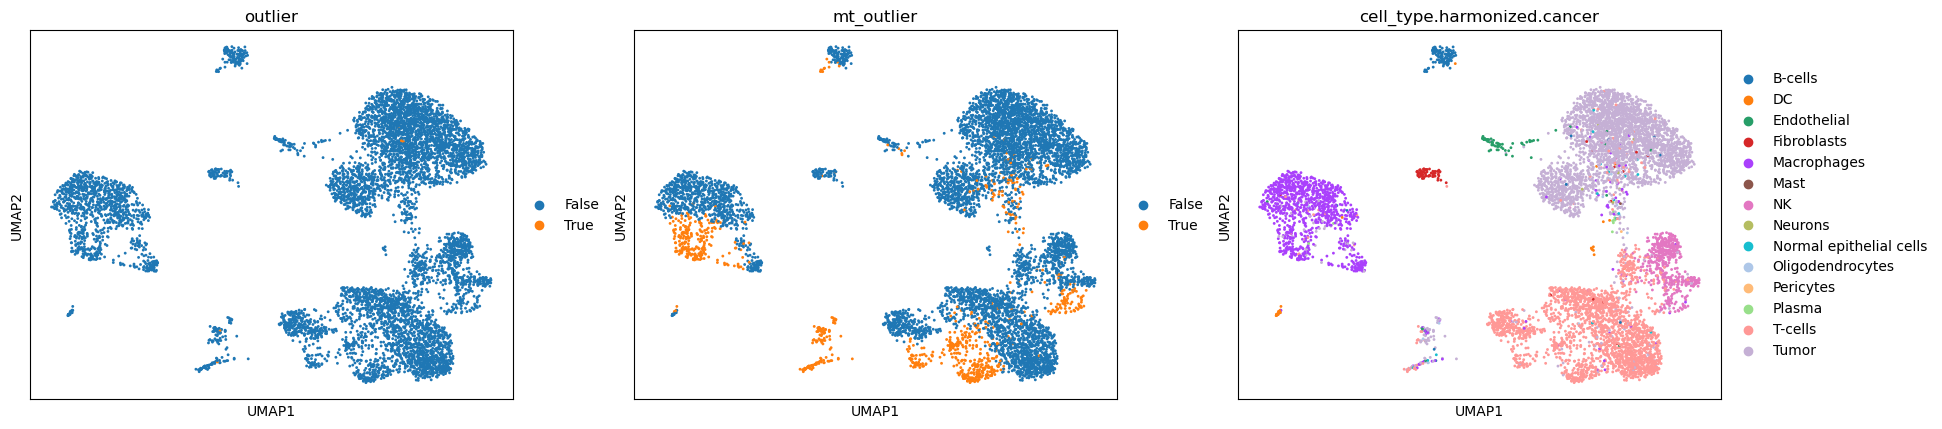

In [99]:
sc.pl.umap(
    adata1_filtered,
    color=["outlier", 'mt_outlier', "cell_type.harmonized.cancer"]
)

#### Filter out the outliers

In [ ]:
#Create a copy of adata and filter on the copy
adata1_filtered_outlier = adata1[adata1.obs['outlier'], :]

adata1_filtered_outlier

View of AnnData object with n_obs × n_vars = 560997 × 36601
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier'
    var: 'gene_ids', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    layers: 'filter_outliers'

### Normalization

In [100]:
# Saving count data
adata1.layers["counts"] = adata1.X.copy()

In [101]:
# Normalizing to median total counts
sc.pp.normalize_total(adata1)
# Logarithmize the data
sc.pp.log1p(adata1)

### Feature selection

In [102]:
sc.pp.highly_variable_genes(adata1, n_top_genes=2000)

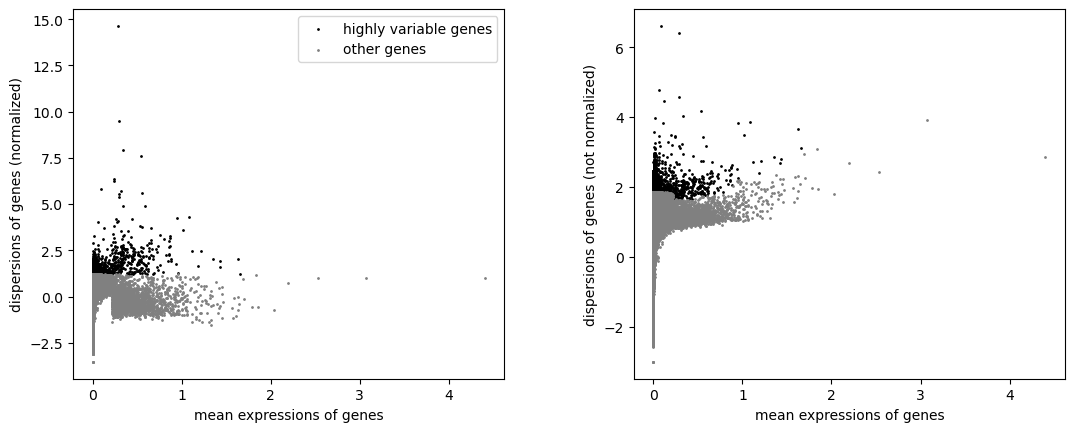

In [103]:
sc.pl.highly_variable_genes(adata1)

In [104]:
adata1 = adata1[:, adata1.var.highly_variable]
adata1

View of AnnData object with n_obs × n_vars = 10394 × 2000
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'outlier', 'mt_outlier'
    var: 'gene_ids', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    layers: 'counts'

### Dimensionality reduction

In [105]:
sc.tl.pca(adata1)

c:\Users\gajaj\anaconda3\envs\preprocessing\lib\site-packages\scanpy\preprocessing\_pca.py:317: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca


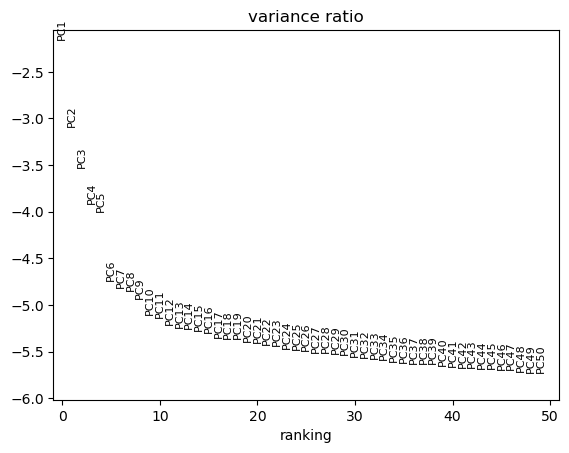

In [106]:
sc.pl.pca_variance_ratio(adata1, n_pcs=50, log=True)

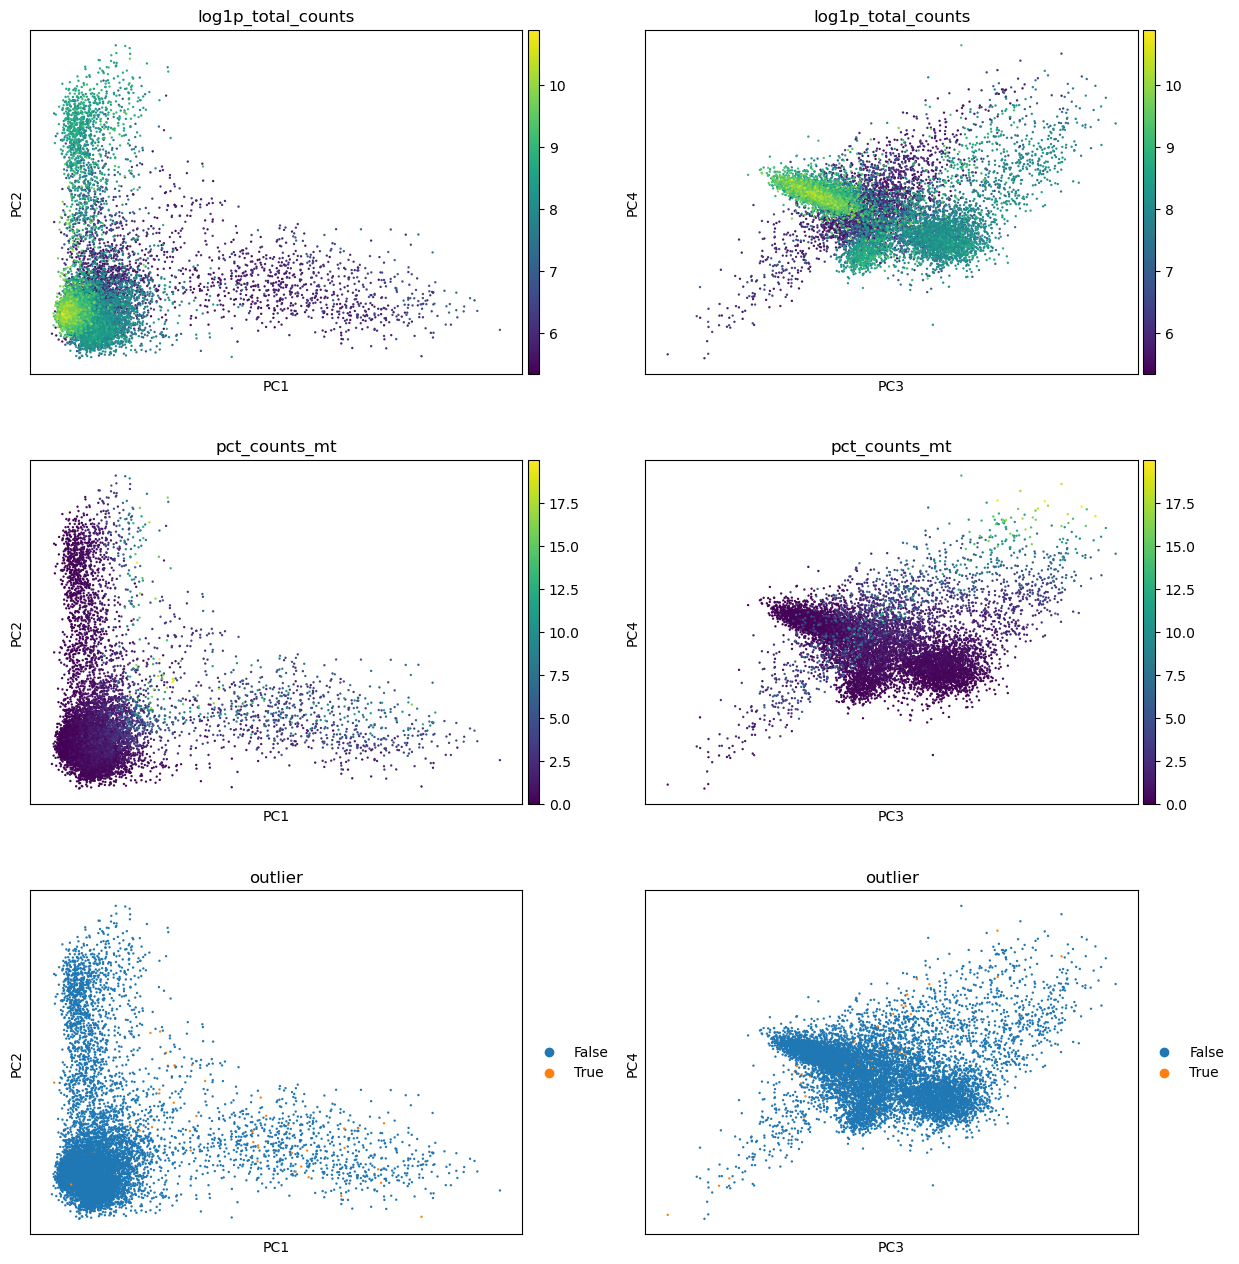

In [107]:
sc.pl.pca(
    adata1,
    color=["log1p_total_counts"] * 2 + ["pct_counts_mt"] * 2 + ["outlier"] * 2,
    dimensions=[(0, 1), (2, 3)] * 3,
    ncols=2,
    # size=2,
)

### Nearest neighbor graph constuction and visualization

In [108]:
sc.pp.neighbors(adata1)

In [109]:
sc.tl.umap(adata1)

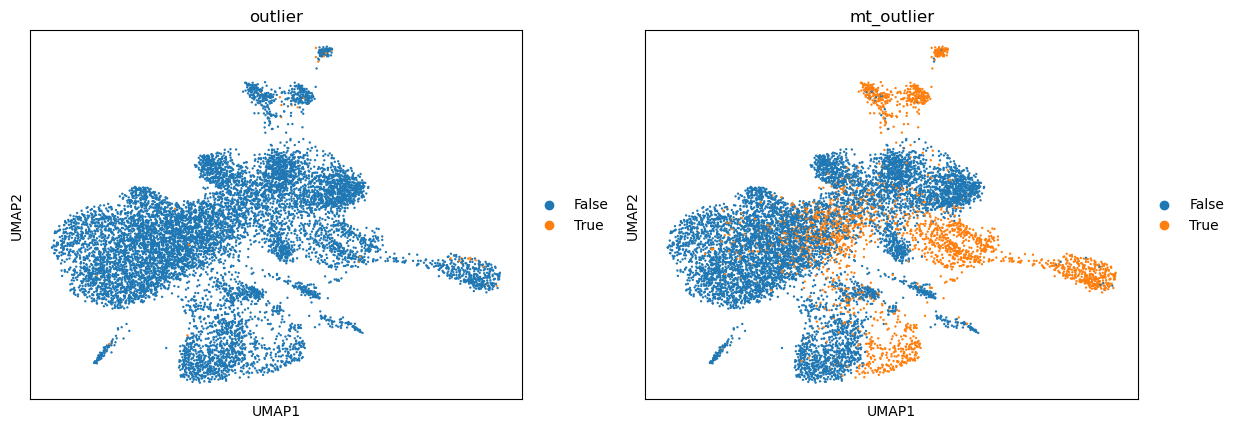

In [112]:
sc.pl.umap(
    adata1,
    color=["outlier", "mt_outlier"]
)

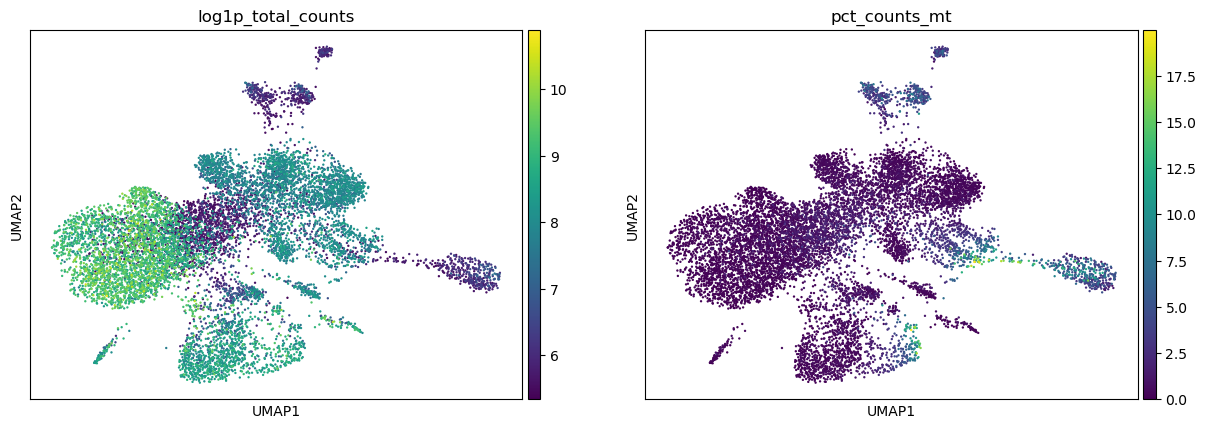

In [111]:
sc.pl.umap(
    adata1,
    color=["log1p_total_counts", "pct_counts_mt"]
)

### Clustering

In [41]:
# Using the igraph implementation and a fixed number of iterations can be significantly faster, especially for larger datasets
sc.tl.leiden(adata1, n_iterations=2)

C:\Users\gajaj\AppData\Local\Temp\ipykernel_3208\2380624730.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata1, n_iterations=2)


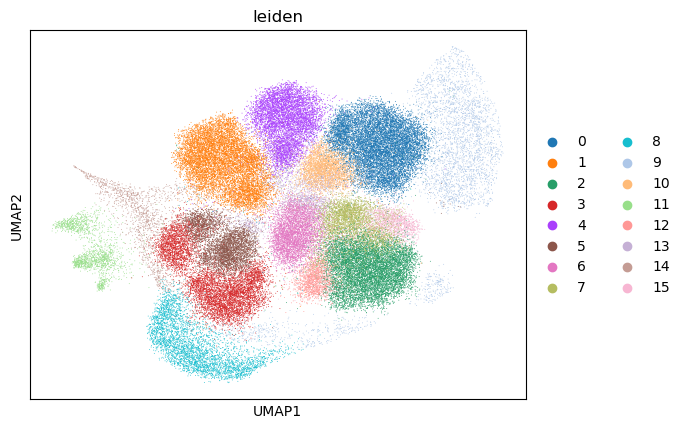

In [42]:
sc.pl.umap(adata1, color=["leiden"])

## Preprocessing sample 2

In [39]:
adata2.var_names_make_unique()

## Quality control

In [40]:
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
adata2.var["mt"] = adata2.var_names.str.startswith("MT-")
# ribosomal genes
adata2.var["ribo"] = adata2.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes
adata2.var["hb"] = adata2.var_names.str.contains("^HB[^(P)]")

adata2.var

,gene_ids,mt,ribo,hb
MIR1302-2HG,ENSG00000243485,False,False,False
FAM138A,ENSG00000237613,False,False,False
OR4F5,ENSG00000186092,False,False,False
AL627309.1,ENSG00000238009,False,False,False
AL627309.3,ENSG00000239945,False,False,False
...,...,...,...,...
AC141272.1,ENSG00000277836,False,False,False
AC023491.2,ENSG00000278633,False,False,False
AC007325.1,ENSG00000276017,False,False,False
AC007325.4,ENSG00000278817,False,False,False


In [41]:
sc.pp.calculate_qc_metrics(
    adata2, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
)

### Filter Cells Based on Total Genes

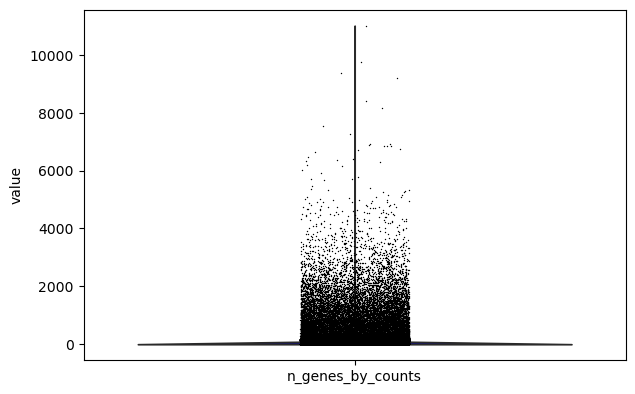

In [42]:
sc.pl.violin(adata2, 'n_genes_by_counts', color='darkblue')

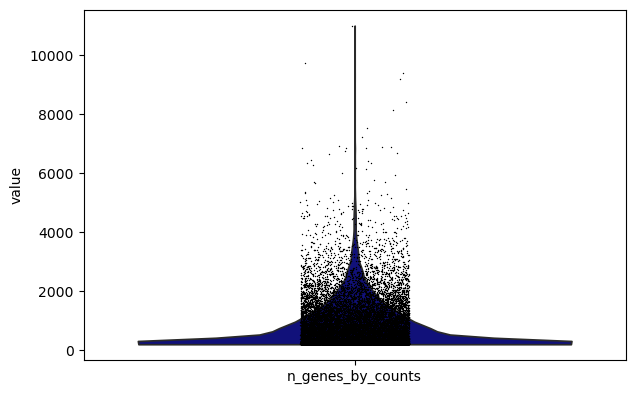

In [43]:
sc.pp.filter_cells(adata2, min_genes=200)
sc.pl.violin(adata2, 'n_genes_by_counts', color='darkblue')

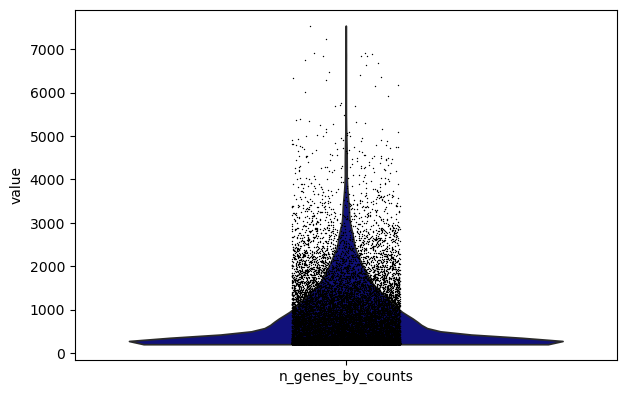

In [44]:
#upper bound
adata2 = adata2[adata2.obs['n_genes_by_counts'] < 8000, :]
sc.pl.violin(adata2, 'n_genes_by_counts', color='darkblue')

### Filter low quality cells

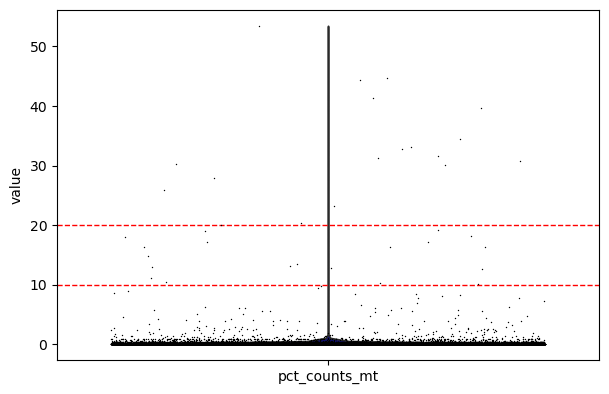

In [45]:
# Plot the violin plot
ax = sc.pl.violin(adata2, "pct_counts_mt", jitter=0.4, log=False, color='darkblue', show=False)

# Add horizontal lines for thresholds
thresholds = [10, 20]  # Replace with your desired percentages
for threshold in thresholds:
    plt.axhline(y=threshold, color='red', linestyle='--', linewidth=1)

# Show the plot
plt.show()

In [60]:
adata2 = adata2[adata2.obs['pct_counts_mt'] < 10, :]

print(adata2.shape)  # Check the number of cells and genes
sc.pl.violin(adata2, ['pct_counts_mt'], jitter=0.4, log=False)


KeyError: 'pct_counts_mt'

In [ ]:
# 